In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

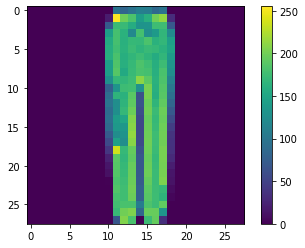

In [ ]:
plt.figure()
plt.imshow(train_images[1000])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

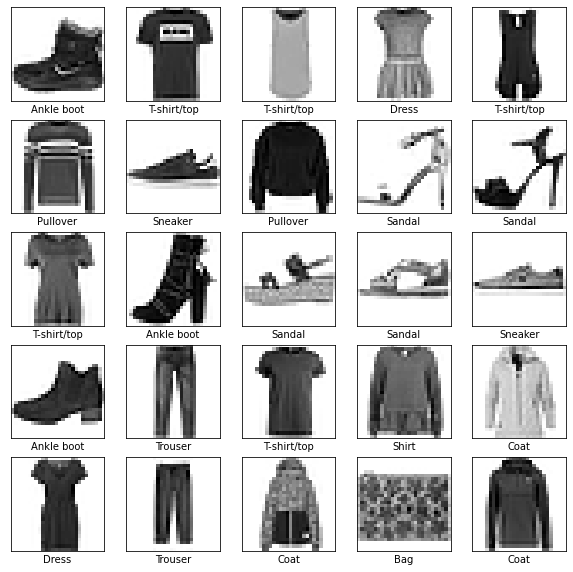

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4960 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3755 - accuracy: 0.8631
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3371 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3135 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2943 - accuracy: 0.8913


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3805 - accuracy: 0.8661

테스트 정확도: 0.866100013256073


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([1.7640112e-05, 3.5713714e-07, 8.4274116e-06, 5.3454752e-08,
       4.1234762e-06, 1.3940877e-01, 6.7170868e-06, 5.3828668e-02,
       5.6109147e-05, 8.0666912e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label= np.argmax(predictions_array)
  if predicted_label == true_label:
    color= 'blue'
  else:
    color= 'red'

    plt.xlabel("{} {:2.0f}% ({})" .format(class_names[predicted_label],
                                   100*np.max(predictions_array),
                                   class_names[true_label]),
                                   color=color )

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar( range(10), predictions_array, color= "#777777")
  plt.ylim([0,1])
  predicted_label= np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

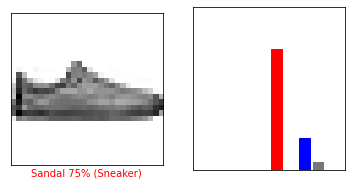

In [ ]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

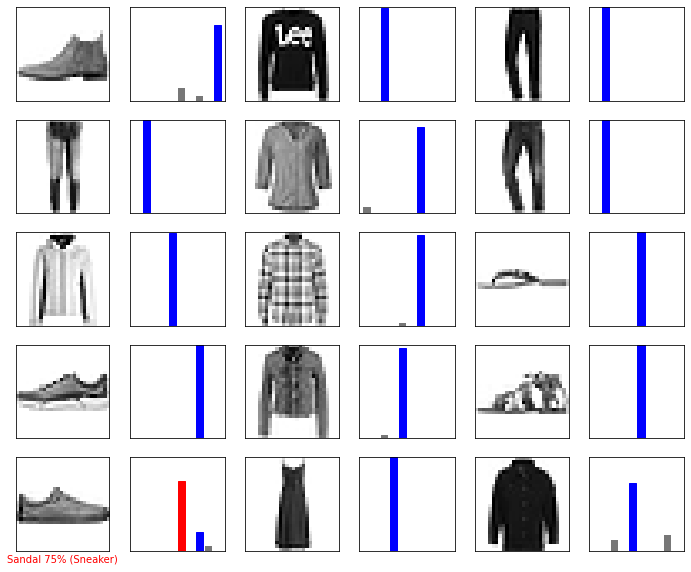

In [47]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [65]:
img = test_images[3000]
print(img.shape)

(28, 28)


In [66]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [67]:
predictions_single = model.predict(img)
print(predictions_single)

[[9.9769727e-07 9.9999607e-01 5.6611064e-08 2.6103462e-06 2.1711176e-07
  6.1452776e-10 9.7131348e-08 4.2951875e-14 6.5900535e-10 5.6584394e-12]]


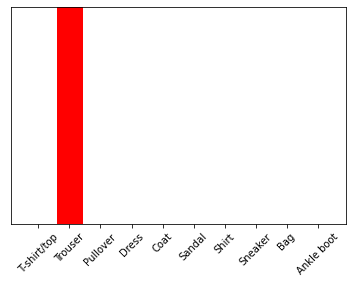

In [68]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation= 45)

In [70]:
np.argmax(predictions_single[0])

1

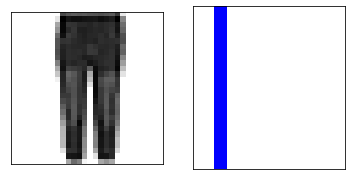

In [72]:
i=3000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()